### Read contour data and preprocess

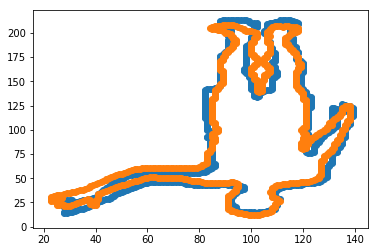

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
path = 'photo\p0\\'

data1 = np.load(path+'small_contours.npy')
data2 = np.load(path+'small_contours_smpl.npy')

len1 = len(data1)
len2 = len(data2) 

plt.scatter(data1[:,0], data1[:,1])
plt.scatter(data2[:,0], data2[:,1])
plt.show()

###  Defining functions for solving correspondences

In [3]:
def distance_2d(x1, y1, x2, y2):
    return np.sqrt(pow(x1-x2,2) + pow(y1-y2,2))

def get_list(mat,start,end):
    if start>=0:
        mat = mat.tolist()[0][start:end]
    else:
        mat_len =mat.size
        mat = mat.tolist()[0]
        mat = mat[mat_len+start:mat_len]+mat[0:end]
    return mat

# Find and return the smallest element in the list and its index
def find_min(current,lis,k,len_n):
    if(current>=k):
        minV = min(lis)
        pos = lis.index(minV)
        return current-k+pos,minV
    else:
        minV = min(lis)
        pos = lis.index(minV)
        if(pos>=k-current):
            return current-k+pos,minV
        else:
            return len_n-k+current+pos,minV

### Relationship of Dynamic Solving Points

In [4]:
dp_matrix_value = np.mat(np.zeros((len1,len2)))
#Save the parent node of the current node
dp_matrix_father = np.mat(np.zeros((len1,len2)))

# Initialize the value of dp to infinity
dp_matrix_value = dp_matrix_value+float('inf')
dp_matrix_father = dp_matrix_father-1 

for j in range(len2):
    dp_matrix_value[0,j] =  distance_2d(data1[0,0],data1[0,1],data2[j,0],data2[j,1])
    dp_matrix_father[0,j] =  j

    
k=32 #Anti-jump factor
for i in range(1,len1):
    for j in range(len2):
        before,min_value = find_min(j,get_list(dp_matrix_value[i-1,:],j-k,j+1),k,len2)
        dp_matrix_value[i,j] = min_value + distance_2d(data1[i,0],data1[i,1],data2[j,0],data2[j,1])
        
        dp_matrix_father[i,j] = before
    print(i,"/",len1)

1 / 845
2 / 845
3 / 845
4 / 845
5 / 845
6 / 845
7 / 845
8 / 845
9 / 845
10 / 845
11 / 845
12 / 845
13 / 845
14 / 845
15 / 845
16 / 845
17 / 845
18 / 845
19 / 845
20 / 845
21 / 845
22 / 845
23 / 845
24 / 845
25 / 845
26 / 845
27 / 845
28 / 845
29 / 845
30 / 845
31 / 845
32 / 845
33 / 845
34 / 845
35 / 845
36 / 845
37 / 845
38 / 845
39 / 845
40 / 845
41 / 845
42 / 845
43 / 845
44 / 845
45 / 845
46 / 845
47 / 845
48 / 845
49 / 845
50 / 845
51 / 845
52 / 845
53 / 845
54 / 845
55 / 845
56 / 845
57 / 845
58 / 845
59 / 845
60 / 845
61 / 845
62 / 845
63 / 845
64 / 845
65 / 845
66 / 845
67 / 845
68 / 845
69 / 845
70 / 845
71 / 845
72 / 845
73 / 845
74 / 845
75 / 845
76 / 845
77 / 845
78 / 845
79 / 845
80 / 845
81 / 845
82 / 845
83 / 845
84 / 845
85 / 845
86 / 845
87 / 845
88 / 845
89 / 845
90 / 845
91 / 845
92 / 845
93 / 845
94 / 845
95 / 845
96 / 845
97 / 845
98 / 845
99 / 845
100 / 845
101 / 845
102 / 845
103 / 845
104 / 845
105 / 845
106 / 845
107 / 845
108 / 845
109 / 845
110 / 845
111 / 84

834 / 845
835 / 845
836 / 845
837 / 845
838 / 845
839 / 845
840 / 845
841 / 845
842 / 845
843 / 845
844 / 845


### Output and store point correspondence

In [5]:
lis=[]

temp = dp_matrix_value[len1-1,:].tolist()[0]
minV = min(temp)
pos = temp.index(minV)
lis.append((len1-1,pos))
print(len1-1,"->",pos)

for i in range(len1-1):
    j = dp_matrix_father[len1-2-i,int(pos)]
    lis.append((len1-2-i,int(j)))
    print(len1-2-i,"->",int(j))
    pos = j
    
numpy_array = np.array(lis)
# np.save('corresponding_contours.npy',numpy_array )
np.save(path+'small_corresponding_contours.npy',numpy_array )
# corresponding_chonghe =np.load('.../corresponding_chonghe.npy')

844 -> 116
843 -> 115
842 -> 115
841 -> 115
840 -> 114
839 -> 102
838 -> 102
837 -> 102
836 -> 102
835 -> 102
834 -> 100
833 -> 99
832 -> 98
831 -> 97
830 -> 95
829 -> 95
828 -> 94
827 -> 93
826 -> 92
825 -> 87
824 -> 86
823 -> 85
822 -> 84
821 -> 83
820 -> 82
819 -> 81
818 -> 79
817 -> 79
816 -> 78
815 -> 77
814 -> 74
813 -> 74
812 -> 73
811 -> 73
810 -> 70
809 -> 66
808 -> 66
807 -> 66
806 -> 65
805 -> 64
804 -> 63
803 -> 62
802 -> 61
801 -> 60
800 -> 59
799 -> 56
798 -> 56
797 -> 53
796 -> 53
795 -> 53
794 -> 53
793 -> 52
792 -> 48
791 -> 48
790 -> 48
789 -> 48
788 -> 47
787 -> 46
786 -> 45
785 -> 44
784 -> 43
783 -> 42
782 -> 41
781 -> 40
780 -> 39
779 -> 39
778 -> 34
777 -> 33
776 -> 33
775 -> 33
774 -> 32
773 -> 32
772 -> 32
771 -> 29
770 -> 28
769 -> 27
768 -> 26
767 -> 25
766 -> 24
765 -> 24
764 -> 22
763 -> 21
762 -> 20
761 -> 19
760 -> 18
759 -> 17
758 -> 16
757 -> 15
756 -> 14
755 -> 13
754 -> 12
753 -> 11
752 -> 8
751 -> 6
750 -> 6
749 -> 5
748 -> 3
747 -> 3
746 -> 1
745 ->

In [6]:
# lis =np.load('corresponding_contours.npy')
lis =np.load(path+'small_corresponding_contours.npy')
# data2 = np.load('.../small_contours_smpl.npy')#这个地方先待定

### Take out the points inside the contour

In [8]:
import cv2
import matplotlib.image as mpimg

#Get the internal point, path is the picture path,
def getPointIn(path,outPoint):
    img =mpimg.imread(path)
    q=[]
    
    w,h,_=img.shape
    
    for i in range(h):
        for j in range(w):
            if cv2.pointPolygonTest(outPoint,(i,j),False)==1:
                q.append([i,j])
    return q

In [9]:
# im_path = 'kuli_mask.png'
im_path =path+ 's_p_mask.png'
list_in_contours  = getPointIn(im_path,data1)
len(list_in_contours)#73273
#17651

6369

In [10]:
for i in list_in_contours:
    print(i)

[28, 22]
[28, 23]
[29, 20]
[29, 21]
[29, 22]
[29, 23]
[29, 24]
[30, 20]
[30, 21]
[30, 22]
[30, 23]
[30, 24]
[30, 25]
[30, 26]
[31, 16]
[31, 19]
[31, 20]
[31, 21]
[31, 22]
[31, 23]
[31, 24]
[31, 25]
[32, 17]
[32, 18]
[32, 19]
[32, 20]
[32, 21]
[32, 22]
[32, 23]
[32, 24]
[33, 18]
[33, 19]
[33, 20]
[33, 21]
[33, 22]
[33, 23]
[33, 24]
[34, 19]
[34, 20]
[34, 21]
[34, 22]
[34, 23]
[34, 24]
[34, 25]
[35, 19]
[35, 20]
[35, 21]
[35, 22]
[35, 23]
[35, 24]
[35, 25]
[35, 26]
[36, 20]
[36, 21]
[36, 22]
[36, 23]
[36, 24]
[36, 25]
[36, 26]
[37, 21]
[37, 22]
[37, 23]
[37, 24]
[37, 25]
[37, 26]
[37, 27]
[38, 22]
[38, 23]
[38, 24]
[38, 25]
[38, 26]
[38, 27]
[38, 28]
[39, 23]
[39, 24]
[39, 25]
[39, 26]
[39, 27]
[39, 28]
[39, 29]
[40, 25]
[40, 26]
[40, 27]
[40, 28]
[40, 29]
[40, 30]
[41, 26]
[41, 27]
[41, 28]
[41, 29]
[41, 30]
[41, 31]
[42, 27]
[42, 28]
[42, 29]
[42, 30]
[42, 31]
[42, 32]
[42, 33]
[42, 34]
[43, 28]
[43, 29]
[43, 30]
[43, 31]
[43, 32]
[43, 33]
[43, 34]
[43, 35]
[43, 36]
[44, 29]
[44, 30]
[

[95, 95]
[95, 96]
[95, 97]
[95, 98]
[95, 99]
[95, 100]
[95, 101]
[95, 102]
[95, 103]
[95, 104]
[95, 105]
[95, 106]
[95, 107]
[95, 108]
[95, 109]
[95, 110]
[95, 111]
[95, 112]
[95, 113]
[95, 114]
[95, 115]
[95, 116]
[95, 117]
[95, 118]
[95, 119]
[95, 120]
[95, 121]
[95, 122]
[95, 123]
[95, 124]
[95, 125]
[95, 126]
[95, 127]
[95, 128]
[95, 129]
[95, 130]
[95, 131]
[95, 132]
[95, 133]
[95, 134]
[95, 135]
[95, 136]
[95, 137]
[95, 138]
[95, 139]
[95, 140]
[95, 141]
[95, 142]
[95, 143]
[95, 144]
[95, 145]
[95, 146]
[95, 147]
[95, 148]
[95, 149]
[95, 150]
[95, 151]
[95, 152]
[95, 153]
[95, 154]
[95, 155]
[95, 156]
[95, 157]
[95, 158]
[95, 159]
[95, 160]
[95, 161]
[95, 162]
[95, 163]
[95, 164]
[95, 165]
[95, 166]
[95, 167]
[95, 168]
[95, 169]
[95, 170]
[95, 171]
[95, 172]
[95, 173]
[95, 174]
[95, 175]
[95, 176]
[95, 177]
[95, 178]
[95, 179]
[95, 180]
[95, 181]
[95, 182]
[95, 183]
[95, 184]
[95, 185]
[95, 186]
[95, 187]
[95, 188]
[95, 189]
[95, 190]
[95, 191]
[95, 192]
[95, 193]
[95, 194]
[95, 

[108, 49]
[108, 50]
[108, 51]
[108, 52]
[108, 53]
[108, 54]
[108, 55]
[108, 56]
[108, 57]
[108, 58]
[108, 59]
[108, 60]
[108, 61]
[108, 62]
[108, 63]
[108, 64]
[108, 65]
[108, 66]
[108, 67]
[108, 68]
[108, 69]
[108, 70]
[108, 71]
[108, 72]
[108, 73]
[108, 74]
[108, 75]
[108, 76]
[108, 77]
[108, 78]
[108, 79]
[108, 80]
[108, 81]
[108, 82]
[108, 83]
[108, 84]
[108, 85]
[108, 86]
[108, 87]
[108, 88]
[108, 89]
[108, 90]
[108, 91]
[108, 92]
[108, 93]
[108, 94]
[108, 95]
[108, 96]
[108, 97]
[108, 98]
[108, 99]
[108, 100]
[108, 101]
[108, 102]
[108, 103]
[108, 104]
[108, 105]
[108, 106]
[108, 107]
[108, 108]
[108, 109]
[108, 110]
[108, 111]
[108, 112]
[108, 113]
[108, 114]
[108, 115]
[108, 116]
[108, 117]
[108, 118]
[108, 119]
[108, 120]
[108, 121]
[108, 122]
[108, 123]
[108, 124]
[108, 125]
[108, 126]
[108, 127]
[108, 128]
[108, 129]
[108, 130]
[108, 131]
[108, 132]
[108, 133]
[108, 134]
[108, 135]
[108, 136]
[108, 137]
[108, 138]
[108, 139]
[108, 140]
[108, 141]
[108, 185]
[108, 186]
[108, 

[120, 82]
[120, 83]
[120, 84]
[120, 85]
[120, 86]
[120, 87]
[120, 88]
[120, 89]
[120, 90]
[120, 91]
[120, 92]
[120, 93]
[120, 94]
[120, 95]
[120, 96]
[120, 97]
[120, 98]
[120, 99]
[120, 100]
[120, 101]
[120, 102]
[120, 103]
[120, 104]
[120, 105]
[120, 106]
[120, 107]
[120, 108]
[120, 109]
[120, 110]
[120, 111]
[120, 112]
[120, 113]
[120, 114]
[120, 115]
[120, 116]
[120, 117]
[120, 118]
[120, 119]
[120, 120]
[120, 121]
[120, 122]
[120, 123]
[120, 124]
[120, 125]
[120, 126]
[120, 127]
[120, 128]
[120, 129]
[120, 130]
[120, 131]
[120, 132]
[120, 133]
[120, 134]
[120, 135]
[120, 136]
[120, 137]
[120, 138]
[120, 139]
[121, 46]
[121, 47]
[121, 48]
[121, 49]
[121, 50]
[121, 51]
[121, 52]
[121, 53]
[121, 54]
[121, 55]
[121, 56]
[121, 57]
[121, 58]
[121, 59]
[121, 60]
[121, 61]
[121, 62]
[121, 63]
[121, 64]
[121, 65]
[121, 66]
[121, 67]
[121, 68]
[121, 69]
[121, 70]
[121, 71]
[121, 72]
[121, 73]
[121, 74]
[121, 75]
[121, 76]
[121, 92]
[121, 93]
[121, 94]
[121, 95]
[121, 96]
[121, 102]
[121, 103

In [11]:
def getTan(x,y,z):
    a=np.array([x[0]-y[0],x[1]-y[1]])
    b=np.array([z[0]-y[0],z[1]-y[1]])
    sin =np.abs((a[0]*b[1]-a[1]*b[0])/(np.linalg.norm(a)*np.linalg.norm(b)))
    return  sin/(1+np.sqrt(1-sin*sin))

In [12]:
data2 = np.load(path+'small_contours_smpl.npy')

In [13]:
result=[]

for pos,j in enumerate(list_in_contours):
    tan=[] 
    for i in range(1,len(data1)):
        tan.append(getTan(data1[i-1],j,data1[i]))
    tan.append(getTan(data1[-1],j,data1[0]))
    w=[]
    sum=0
    for i in range(len(data1)):        
        w.append( (tan[i]+tan[i-1])/np.sqrt((data1[i][0]-j[0])*(data1[i][0]-j[0])+(data1[i][1]-j[1])*(data1[i][1]-j[1])))
        sum=sum+w[-1]
    w=w/sum

    a=0
    b=0
    for q in range(len(data1)):
        a=a+w[q]*data2[ (int)( lis[len1-1-q][1])  ][0]
        b=b+w[q]*data2[ (int)( lis[len1-1-q][1])  ][1]
    result.append((list_in_contours[pos],[int(a),int(b)]))
    
    if(pos%1000==0):
        print(pos,result[-1]) 


0 ([28, 22], [29, 22])
1000 ([89, 60], [86, 62])
2000 ([95, 91], [99, 90])
3000 ([101, 43], [97, 45])
4000 ([109, 28], [107, 30])
5000 ([114, 209], [111, 203])
6000 ([126, 60], [122, 62])


In [14]:
len(result)

6369

In [15]:
result_np = np.array(result)
# np.save('corresponding_in.npy',result_np )
np.save(path+'small_corresponding_in.npy',result_np )

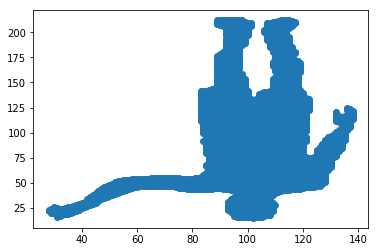

In [16]:
x_duiyinghou =result_np[:,0,0]
y_duiyinghou =result_np[:,0,1]

plt.scatter(x_duiyinghou, y_duiyinghou)
plt.show()